### PSK (Faz Kaydırmalı Anahtarlama - Phase Shifting Key)

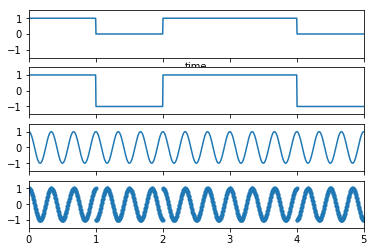

In [8]:
from __future__ import division

import numpy as np
import scipy
import matplotlib.pylab as plt

unipolar_arr = np.array([1, 0, 1, 1, 0])
bipolar = 2*unipolar_arr - 1
bit_duration = 1
amplitude_scaling_factor = bit_duration/2  # This will result in unit amplitude waveforms
freq = 3/bit_duration  # carrier frequency
n_samples = 1000
time = np.linspace(0, 5, n_samples)

samples_per_bit = n_samples/unipolar_arr.size  # no need for np.divide. Also, use size rather than shape if you want something similar to Matlab's "length"
# 1. Use repeat rather than tile (read the docs)
# 2. No need for conjugate transpose
dd = np.repeat(unipolar_arr, samples_per_bit)  # replicate each bit Nsb times
bb = np.repeat(bipolar, samples_per_bit)  # Transpose the rows and columns
dw = dd
# no idea why this is here
#dw = dw.flatten(0).conj()
bw = bb  # one again, no need for conjugate transpose
# no idea why this is here
#bw = bw.flatten(0).conj()
waveform = np.sqrt(2*amplitude_scaling_factor/bit_duration) * np.cos(2*np.pi * freq * time)  # no need for np.dot to perform scalar-scalar multiplication or scalar-array multiplication
bpsk_w = bw*waveform

f, ax = plt.subplots(4,1, sharex=True, sharey=True, squeeze=True)
ax[0].plot(time, dw)
ax[1].plot(time, bw)
ax[2].plot(time, waveform)
ax[3].plot(time, bpsk_w, '.')
ax[0].axis([0, 5, -1.5, 1.5])
ax[0].set_xlabel('time')
plt.show()